
# Analysis of the #MeToo Movement on Twitter

## Problem Statement
According to the CDC, in the United States, "46.3% of women (nearly 52.2 million) experienced some form of contact sexual violence in their lifetime". The #metoo movement, initiated by a tweet from Alyssa Milano, seeks to raise awareness of the widespread issue of sexual assault and harassment faced by women. This project aims to analyze the impact and reach of the #MeToo movement on Twitter, understanding its role in societal change and empowerment.

Social movements have increasingly utilized social media platforms for greater reach and impact. Notable movements like Arab Spring, Occupy Wall Street, Los Indignados, and Black Lives Matter have shown significant online presence, influencing both online and offline dialogues. The #MeToo movement, in particular, started online and quickly moved offline, marking a shift in the typical social media process. Within the first year of its inception, the hashtag #metoo was used more than 19 million times.

The analysis of this movement on Twitter offers valuable insights into societal attitudes towards sexual harassment and assault, the spread of social movements in the digital age, and the overall impact of social media activism.

## Real-World Significance
The findings from this analysis can provide a deeper understanding of the digital footprint of the #MeToo movement. It can help in assessing the movement's influence on societal perceptions, policy-making, and individual behavior. Additionally, this study serves as a case for the power of social media in mobilizing and empowering social movements globally.
    

# Libraries

In [1]:
#Generic Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re,string,unicodedata
from string import punctuation
from math import pi
from PIL import Image

#Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models import TabPanel, Tabs

from bokeh.palettes import Category20c
from bokeh.transform import cumsum
from bokeh.resources import INLINE

#NLTK Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

#Warnings
import warnings
warnings.filterwarnings("ignore")

#Garbage Collection
import gc

#downloading wordnet/punkt dictionary
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

#WordCloud Generator
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Gensim Library for Text Processing
import gensim.parsing.preprocessing as gsp
from gensim import utils

# TextBlob Library
!pip install -U textblob
from textblob import TextBlob, Word

#Keyword Extraction Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Tabulate
from tabulate import tabulate

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SUNYLoaner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SUNYLoaner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUNYLoaner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [118]:
#data loading
data_url = 'metoohate.csv'
data = pd.read_csv(data_url, header= 0,
                        encoding= 'unicode_escape')

# Dataset overview

In [119]:
#Inspect
data.head()

,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,category,gender
0,1046207313588236290,"Entitled, obnoxious, defensive, lying weasel. ...",2018-09-30T01:17:15Z,5.0,1,"McAllen, TX",2253.0,2303.0,23856.0,0,Female
1,1046207328113086464,Thank you and for what you did for the women...,2018-09-30T01:17:19Z,5.0,2,"Tampa, FL",2559.0,4989.0,19889.0,0,Female
2,1046207329589493760,Knitting (s) &amp; getting ready for January 1...,2018-09-30T01:17:19Z,0.0,0,"St Cloud, MN",16.0,300.0,9.0,0,Female
3,1046207341283168256,Yep just like triffeling women weaponized thei...,2018-09-30T01:17:22Z,1.0,0,flyover country,3573.0,3732.0,38361.0,1,Female
4,1046207347016826880,"No, the President wants to end movement posin...",2018-09-30T01:17:23Z,0.0,0,World,294.0,312.0,7635.0,0,Female


In [4]:
#Shape
print("Total Tweets: ",data.shape[0])

Total Tweets:  807176


In [5]:
# Basic statistics for numerical columns
data.describe()

,favorite_count,followers_count,friends_count,statuses_count
count,807174.000000,8.071740e+05,807174.000000,8.071740e+05
mean,6.466671,4.663755e+04,6306.597245,4.793559e+04
std,159.865656,6.111813e+05,40549.763577,1.646474e+05
min,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,1.070000e+02,160.000000,1.663250e+03
50%,0.000000,5.390000e+02,528.000000,8.007000e+03
75%,1.000000,2.844000e+03,1756.000000,3.317500e+04
max,70385.000000,5.457643e+07,899383.000000,9.565126e+06


In [6]:
# Summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807176 entries, 0 to 807175
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   status_id        807175 non-null  object 
 1   text             803638 non-null  object 
 2   created_at       807174 non-null  object 
 3   favorite_count   807174 non-null  float64
 4   retweet_count    807174 non-null  object 
 5   location         616406 non-null  object 
 6   followers_count  807174 non-null  float64
 7   friends_count    807174 non-null  float64
 8   statuses_count   807174 non-null  float64
 9   category         807174 non-null  object 
 10  gender           807173 non-null  object 
dtypes: float64(4), object(7)
memory usage: 67.7+ MB


# Data cleaning and preprocessing

In [7]:
#Check for null values
print("Number of records with null text columns: ",data['text'].isna().sum())

Number of records with null text columns:  3538


In [8]:
# Handle missing values
data.dropna(subset=['text'], inplace=True)  # Drop rows where 'text' is missing
data['location'].fillna('Unknown', inplace=True)  # Fill missing locations with 'Unknown'

In [9]:
# Cleaning text data
def clean_text(text):
    if not isinstance(text, str):
        return ''  # Or 'NaN' or some other placeholder text
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\W+', ' ', text)  # Remove special chars and punctuation
    text = text.lower()  # Convert to lowercase
    return text


print("Before Cleaning:")
print(data[['text']].head(5))  

data['text'] = data['text'].apply(clean_text)

print("\nAfter Cleaning:")
print(data[['text']].head(5))


Before Cleaning:
                                                text
0  Entitled, obnoxious, defensive, lying weasel. ...
1  Thank you  and  for what you did for the women...
2  Knitting (s) &amp; getting ready for January 1...
3  Yep just like triffeling women weaponized thei...
4  No, the President wants to end  movement posin...

After Cleaning:
                                                text
0  entitled obnoxious defensive lying weasel this...
1  thank you and for what you did for the women a...
2  knitting s amp getting ready for january 19 2019 
3  yep just like triffeling women weaponized thei...
4  no the president wants to end movement posing ...


In [10]:
#See the numerical columns in the data
numerical_columns=[col for col in data.columns if data[col].dtype!='object']

# Outlier detection and handling
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for column in numerical_columns:
    data= remove_outliers(data, column)

# Exploratory data analysis

In [11]:
#Number of Characters
data['chars'] = data['text'].str.len()
print(data['chars'])

2          49
4          62
5          49
7         271
8          95
         ... 
807169    225
807170     30
807171    236
807174    217
807175    256
Name: chars, Length: 450985, dtype: int64


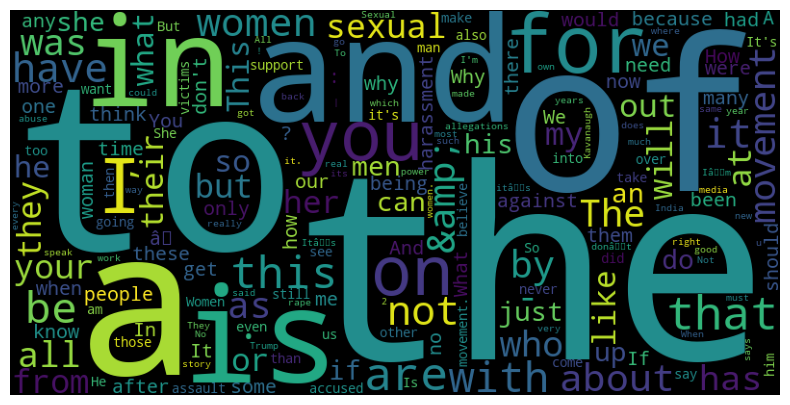

In [120]:
from collections import Counter

data['text'] = data['text'].astype(str)  # Convert 'text' column to strings

# Word frequency distribution
all_words = ' '.join(data['text']).split()
freq_dist = Counter(all_words)

# WordCloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(freq_dist)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


<Axes: xlabel='gender', ylabel='count'>

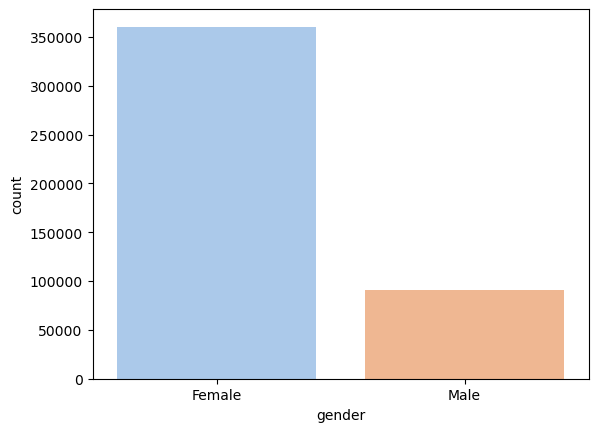

In [82]:
#Categorical Data Analysis:
sns.countplot(x='gender', data=data)


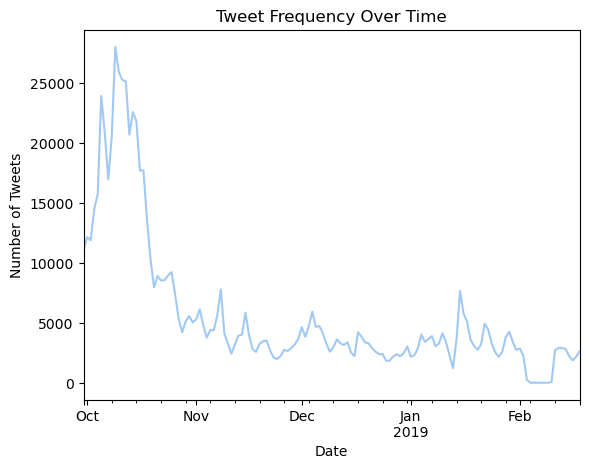

In [121]:
# Robust date parsing function
def robust_parse_date(date_str):
    try:
        return pd.to_datetime(date_str, errors='coerce')  # 'coerce' will set invalid parsing as NaT
    except Exception as e:
        return pd.NaT  # Return 'Not a Time' for invalid dates

# Apply the robust parsing method
data['created_at'] = data['created_at'].apply(robust_parse_date)

# Remove rows where dates could not be parsed
data.dropna(subset=['created_at'], inplace=True)

# Set the index to the 'created_at' column for time series analysis
data.set_index('created_at', inplace=True)

# Plotting the number of tweets over time
data.resample('D').size().plot()
plt.title('Tweet Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

<Axes: >

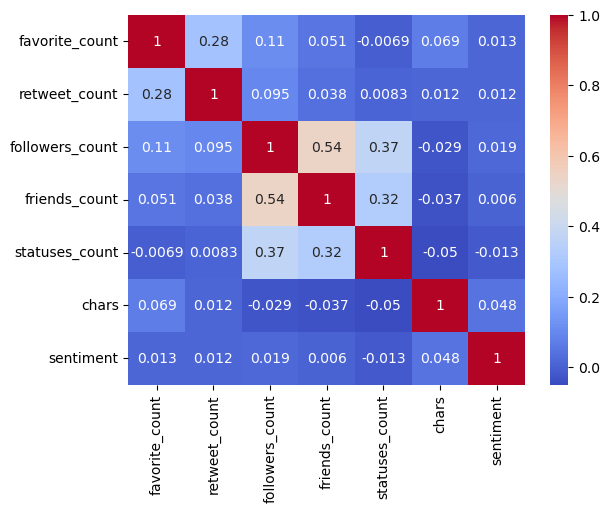

In [85]:
#Correlation analysis
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


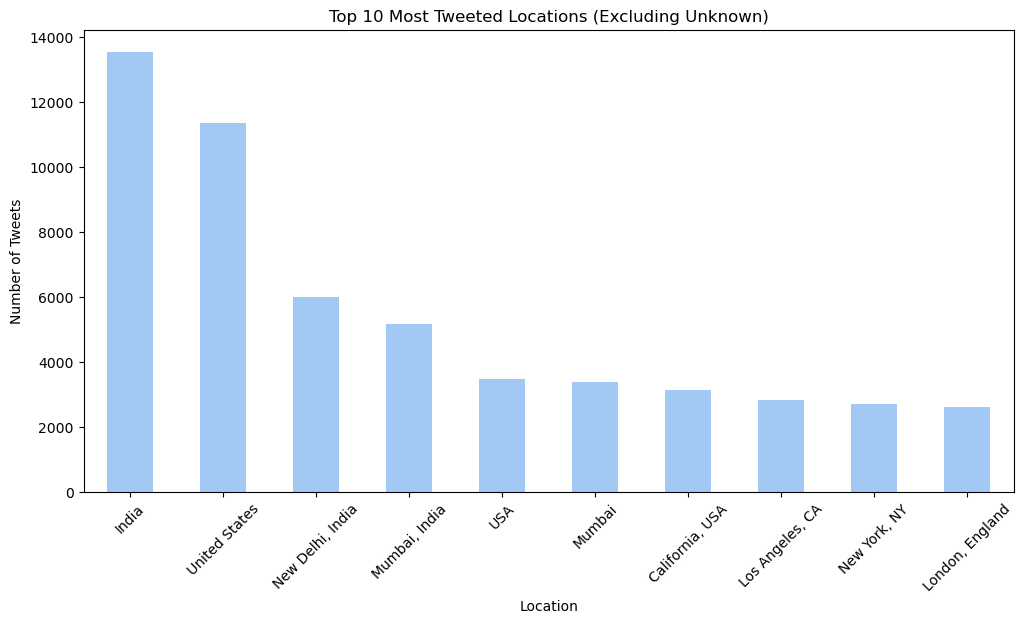

In [86]:
#Visualizing top 10 countries most tweeted 

# Count the frequency of each location, excluding 'Unknown'
location_counts = data[data['location'].str.lower() != 'unknown']['location'].value_counts()

# Select the top 10 locations for visualization
top_locations = location_counts.head(10)  # Top 10 most tweeted locations

# Create a bar chart
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar')
plt.title('Top 10 Most Tweeted Locations (Excluding Unknown)')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)  # Rotate the location names for better readability
plt.show()

In [87]:
# Convert columns to numeric, errors='coerce' will set non-convertible values to NaN
data['followers_count'] = pd.to_numeric(data['followers_count'], errors='coerce')
data['retweet_count'] = pd.to_numeric(data['retweet_count'], errors='coerce')

# Drop rows with NaN values in these columns
data.dropna(subset=['followers_count', 'retweet_count'], inplace=True)

# Finding the highest and lowest number of followers
max_followers = data['followers_count'].max()
min_followers = data['followers_count'].min()

# Finding the highest and lowest number of retweets
max_retweets = data['retweet_count'].max()
min_retweets = data['retweet_count'].min()

# Finding the tweet with the highest and lowest number of retweets
tweet_max_retweets = data[data['retweet_count'] == max_retweets]['text'].iloc[0]
tweet_min_retweets = data[data['retweet_count'] == min_retweets]['text'].iloc[0]

# Printing the results
print("Highest number of followers:", max_followers)
print("Lowest number of followers:", min_followers)
print("Highest number of retweets:", max_retweets)
print("Lowest number of retweets:", min_retweets)

Highest number of followers: 4662.0
Lowest number of followers: 0.0
Highest number of retweets: 57
Lowest number of retweets: 0


Stat Summary of Tweet Chars:
Minimum Character Count   : 1
Maximum Character Count   : 724
Average Character Count   : 119


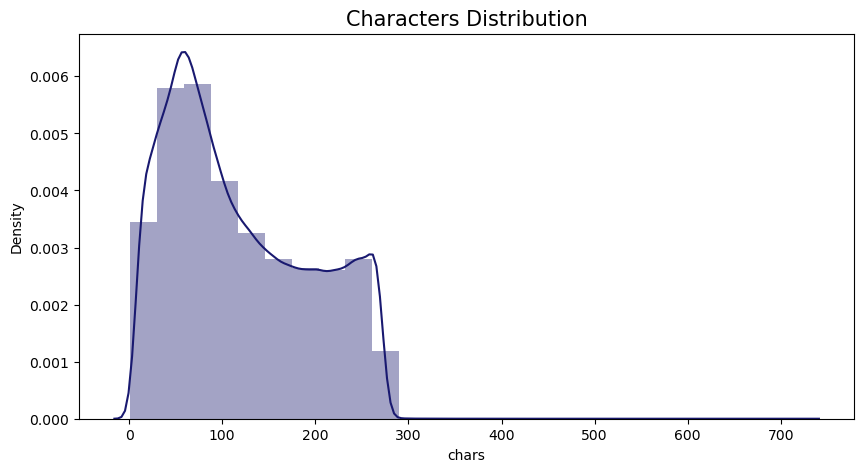

In [18]:
# Function to plot histogram
def plot_sumry(dataframe,column, title=''):
    plt.figure(figsize=(10,5))
    sns.set_palette('pastel')
    sns.set_color_codes()
    ax = sns.distplot(dataframe[column], color='midnightblue', bins=25)
    ax.set_title(title, fontsize=15)
    
    x_min = dataframe[column].min()
    x_max = dataframe[column].max()
    x_mean = dataframe[column].mean()
    
    print(f'Stat Summary of Tweet {column.capitalize()}:\n'
          f'Minimum Character Count   : {x_min}\n'
          f'Maximum Character Count   : {x_max}\n'
          f'Average Character Count   : {round(x_mean)}')

    
plot_sumry(data, 'chars', 'Characters Distribution')
    


# Observations from EDA

Through the aforementioned exploratory data analysis, we gained profound insights into the dataset. A more detailed discussion can be found in the project report document; here, we provide a brief overview.

1) While the word cloud visually represents the frequency of word usage, the predominance of common words suggests a need for more advanced text processing techniques, such as removing stopwords or employing natural language processing (NLP) techniques, to glean more meaningful insights from the textual content.
2) Categorical analysis : The analysis revealed that a significant majority of the tweets (~35,000) were categorized under ' the female gender, while around 10,000 tweets were from men.
3) There was a noticeable peak in tweet activity in October 2018, followed by a gradual decline into 2019.
4) The correlation analysis did not reveal any significant relationships between the analyzed variables. The lack of strong correlations suggests that the dataset variables operate independently in the context of the #MeToo movement.
5) The top 10 locations with the most tweets were predominantly from India and the USA.
6) It seems sense that there are a lot of tweets that are between one and 150 characters long.

# Text Processing

In [64]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define functions for lemmatizing 

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmatized_tokens)


# Apply the functions to the text column
data['text'] = data['text'].apply(lemmatize_text)



,status_id,text,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,category,gender,chars
created_at,,,,,,,,,,,
2018-09-30 01:17:19+00:00,1046207329589493760,knitting s amp getting ready for january 19 2019,0.0,0,"St Cloud, MN",16.0,300.0,9.0,0,Female,49
2018-09-30 01:17:23+00:00,1046207347016826880,no the president want to end movement posing a...,0.0,0,World,294.0,312.0,7635.0,0,Female,62
2018-09-30 01:17:25+00:00,1046207355526950913,lock justin timberlake up he raped janet jackson,0.0,0,Rust Belt,19.0,63.0,505.0,0,Male,49
2018-09-30 01:17:39+00:00,1046207412246478848,save it for fox fake newsâ watched by racist b...,0.0,0,Unknown,718.0,1648.0,16113.0,1,Female,271
2018-09-30 01:17:43+00:00,1046207429359398912,pulitzer prize winner emily steel on how thing...,1.0,1,Unknown,1152.0,136.0,12715.0,0,Female,95


In [66]:
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered_text)

data['text'] = data['text'].apply(remove_stop_words)

# Display the first few rows to verify the changes
data_sample[['text']].head()


,text
0,like rare sexually harassed men harasses woman...
1,noticed big changed right death freed bondage
2,get ready sex abuse thefts porn canada emergin...
3,err regarding right hand man sexually harassed...
4,yeah single handedly started whole movement india


# Sentiment analysis

In [67]:
def get_sentiment(text):
    blob = TextBlob(str(text))
    if blob.sentiment.polarity > 0:
        return 1
    elif blob.sentiment.polarity == 0:
        return 0
    else:
        return -1

data['sentiment'] = data['text'].apply(get_sentiment)

In [68]:
data.head()

,status_id,text,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,category,gender,chars,sentiment
created_at,,,,,,,,,,,,
2018-09-30 01:17:19+00:00,1046207329589493760,knitting amp getting ready january 19 2019,0.0,0,"St Cloud, MN",16.0,300.0,9.0,0,Female,49,1
2018-09-30 01:17:23+00:00,1046207347016826880,president want end movement posing movement,0.0,0,World,294.0,312.0,7635.0,0,Female,62,0
2018-09-30 01:17:25+00:00,1046207355526950913,lock justin timberlake raped janet jackson,0.0,0,Rust Belt,19.0,63.0,505.0,0,Male,49,0
2018-09-30 01:17:39+00:00,1046207412246478848,save fox fake newsâ watched racist bigot amp w...,0.0,0,Unknown,718.0,1648.0,16113.0,1,Female,271,-1
2018-09-30 01:17:43+00:00,1046207429359398912,pulitzer prize winner emily steel thing change...,1.0,1,Unknown,1152.0,136.0,12715.0,0,Female,95,0


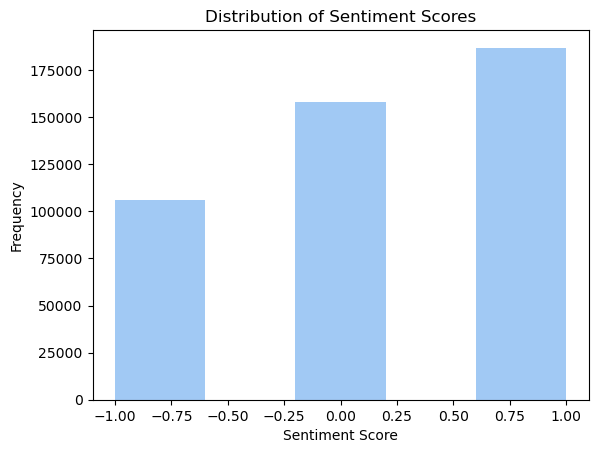

In [69]:
#Plotting the Sentiment scores
plt.hist(data['sentiment'], bins=5)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='sentiment'>

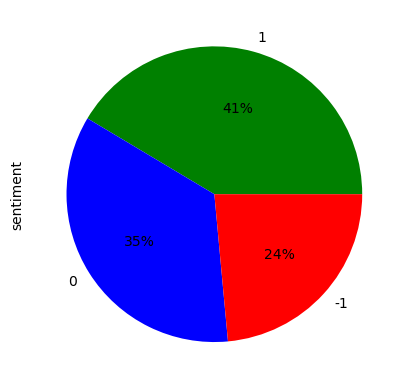

In [70]:
data.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "blue", "red"])

Here 

1 - Postive sentiment
0 - Neutral Sentiment
-1 - Negative sentiment 

A high percentage of positive tweets might indicate strong awareness and engagement with the #MeToo movement. Positive sentiment could suggest support, solidarity, and endorsement of the movement's goals.

<Axes: xlabel='sentiment', ylabel='favorite_count'>

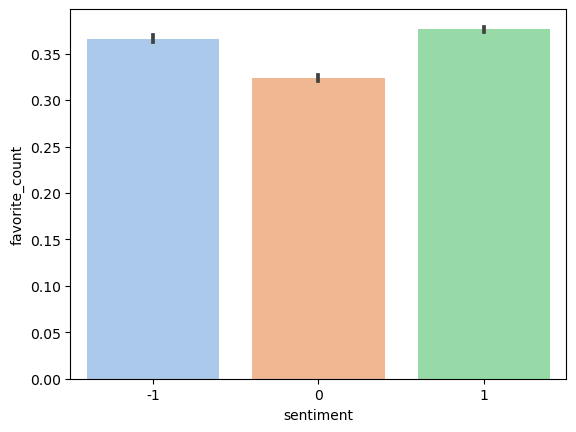

In [88]:
#Plotting a bar plot to visualize most favourite sentiment analysis

sns.barplot(x='sentiment', y='favorite_count' , data=data)

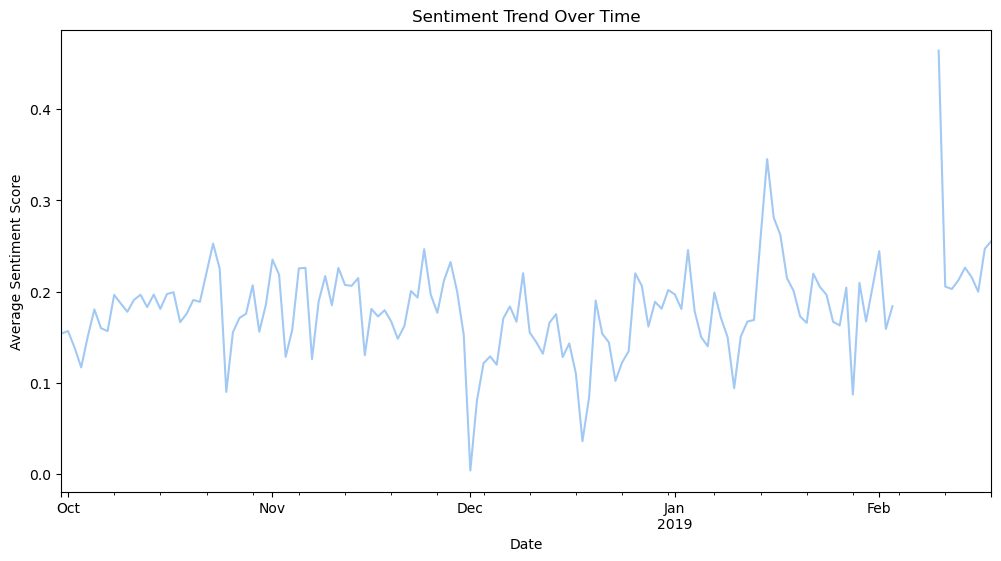

In [96]:
average_sentiment_over_time = data['sentiment'].resample('D').mean()


# Plotting the sentiment trend over time
plt.figure(figsize=(12, 6))
average_sentiment_over_time.plot()
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.show()


In [110]:
positive_tweets = data[data['sentiment'] == 1]['text']
negative_tweets = data[data['sentiment'] == -1]['text']


def tokenize_and_count(texts):
    all_words = []
    for text in texts:
        tokens = word_tokenize(text)
        words = [word.lower() for word in tokens if word.isalpha() and len(word) >= 4]
        all_words.extend(words)
    return all_words

# Tokenize and count words for positive and negative tweets
positive_words = tokenize_and_count(positive_tweets)
negative_words = tokenize_and_count(negative_tweets)

# Count the frequency of each word
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

stop_words = set(stopwords.words('english'))

filtered_positive_word_counts = {word: count for word, count in positive_word_counts.items() if word not in stop_words}
filtered_negative_word_counts = {word: count for word, count in negative_word_counts.items() if word not in stop_words}


import plotly.express as px

most_common_positive_words = pd.DataFrame(filtered_positive_word_counts.items(), columns=['Common_words', 'count'])
most_common_positive_words = most_common_positive_words.sort_values('count', ascending=False).head(10)

fig = px.bar(most_common_positive_words, x='count', y='Common_words', title='Most Common Positive Words', orientation='h', width=700, height=700, color='Common_words')
fig.show()



In [111]:
most_common_negative_words = pd.DataFrame(filtered_negative_word_counts.items(), columns=['Common_words', 'count'])
most_common_negative_words = most_common_negative_words.sort_values('count', ascending=False).head(10)

fig = px.bar(most_common_negative_words, x='count', y='Common_words', title='Most Common Negative Words', orientation='h', width=700, height=700, color='Common_words')
fig.show()


In [115]:
#Emotinal analysis

!pip install NRCLex

from nrclex import NRCLex

def analyze_emotion(text):
    # Create an NRCLex object
    emotion = NRCLex(text)
    # Return a dictionary of emotion scores
    return emotion.affect_frequencies

# Apply the function to your text data
data['emotions'] = data['text'].apply(analyze_emotion)

# Display the first few rows to verify the changes
data[['text', 'emotions']].head()


INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 0.0/396.4 kB ? eta -:--:--
     ---------------------- --------------- 235.5/396.4 kB 7.3 MB/s eta 0:00:01
     -------------------------------------- 396.4/396.4 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43341 sha256=83f0270eab6e748c0939a19d765f3eb53b0c1c4dcdfec24c18ae4c294224d5cb
  Stored in directory: c:\users\sunyloaner\appdata\local\pip\cache\wheels\ed\ac\fa\7afddefd14f51c4a963ed291b9052746ed3929473e5a33118d
Successfully built NRCLex


,text,emotions
created_at,,
2018-09-30 01:17:19+00:00,knitting amp getting ready january 19 2019,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
2018-09-30 01:17:23+00:00,president want end movement posing movement,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
2018-09-30 01:17:25+00:00,lock justin timberlake raped janet jackson,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
2018-09-30 01:17:39+00:00,save fox fake newsâ watched racist bigot amp w...,"{'fear': 0.13043478260869565, 'anger': 0.17391..."
2018-09-30 01:17:43+00:00,pulitzer prize winner emily steel thing change...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."


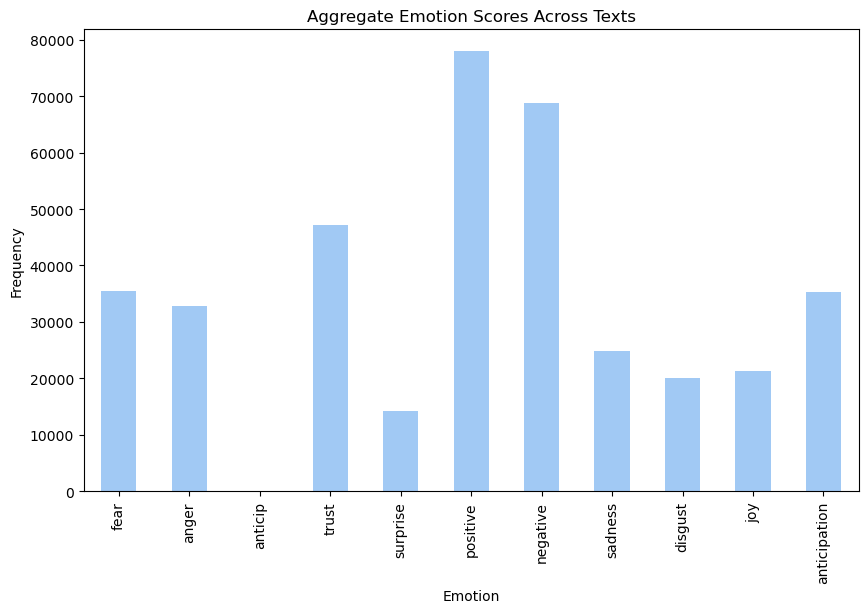

In [116]:
# Extract and sum up the emotion scores
emotion_sums = pd.DataFrame(data['emotions'].tolist()).sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
emotion_sums.plot(kind='bar')
plt.title('Aggregate Emotion Scores Across Texts')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()

#    Results and interpretation

1) The dataset exhibits a plurality of positive sentiment (41%), followed by a substantial proportion of neutral (35%) and negative sentiments (24%). This suggests that while there is a significant positive outlook towards the movement, a noteworthy portion of the conversation is either neutral or negative, indicating diverse viewpoints and possibly some contention or skepticism.

2) The sentiment distribution in the most favorited tweets is fairly evenly split across positive, negative, and neutral sentiments.  The balanced sentiment distribution in highly engaged tweets may reflect the complexity and varied nature of public engagement with the movement. It indicates that tweets from different sentiment spectrums resonate with the audience.

3) The sentiment trend shows fluctuations between 0.1 and 0.3, with significant dips in December and a spike in February. The fluctuations likely correspond to specific events or revelations associated with the movement. The decrease in December could be tied to negative news or developments, while the increase in February might indicate positive advancements or supportive narratives.

4) Positive tweets frequently mention 'woman', 'movement', 'sexual', 'harassment', etc., while negative tweets often include 'woman', 'movement', 'victim', etc. The overlap of words like 'woman' and 'movement' in both positive and negative contexts underscores the central focus of the discourse. The presence of words like 'sexual', 'harassment', and 'victim' reflects key issues at the heart of the movement.

5) The analysis shows a predominance of positive and negative emotions, followed by fear, anger, and disgust. This emotional profile indicates strong, polarized feelings about the movement, with fear, anger, and disgust possibly reflecting the serious nature of the issues involved.



# Real-World Implications and Recommendations

1) Public Awareness and Education: The mixed sentiments and diverse emotional responses highlight the need for continued public education and awareness campaigns about sexual harassment and assault issues.

2) Support Systems: The presence of negative emotions like fear and anger emphasizes the importance of robust support systems for victims and survivors.

3) Community Engagement: Organizations and activists can leverage the insights from positive sentiments to further mobilize support and engagement for the movement.

4) Media and Communication Strategy: Understanding the sentiment and emotional landscape can guide media outlets and communicators in how they present stories related to the movement, ensuring balanced and sensitive reporting.